# Part II - Ford Go Bike
## by Mohamed Najib Adan

## Investigation Overview

- Age isn't an excuse for not exercising. 
- Age, Gender and whether if you are customer or a subscriber is a key factor on ride duration. 
- Are there peak hours and slow days?


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains ride information like ride duration length, age and gender of the rider and where the ride started and ended.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#### Preliminary wrangling and transformation

In [3]:
df.member_birth_year.fillna(0,inplace=True)
df.member_birth_year = df.member_birth_year.astype('int64')
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=df.user_type.unique())
df.user_type = df.user_type.astype(userclasses)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['age'] = 2019 - df.member_birth_year
df['duration_min'] = df.duration_sec / 60
age_subset = df.query('age != 2019') 
color = sb.color_palette()[0]

## Age is not an excuse for not riding a bike!

Not only is riding a bike really good way to enjoy the scenery while exercising it's also not as physically demanding as compared to running. 

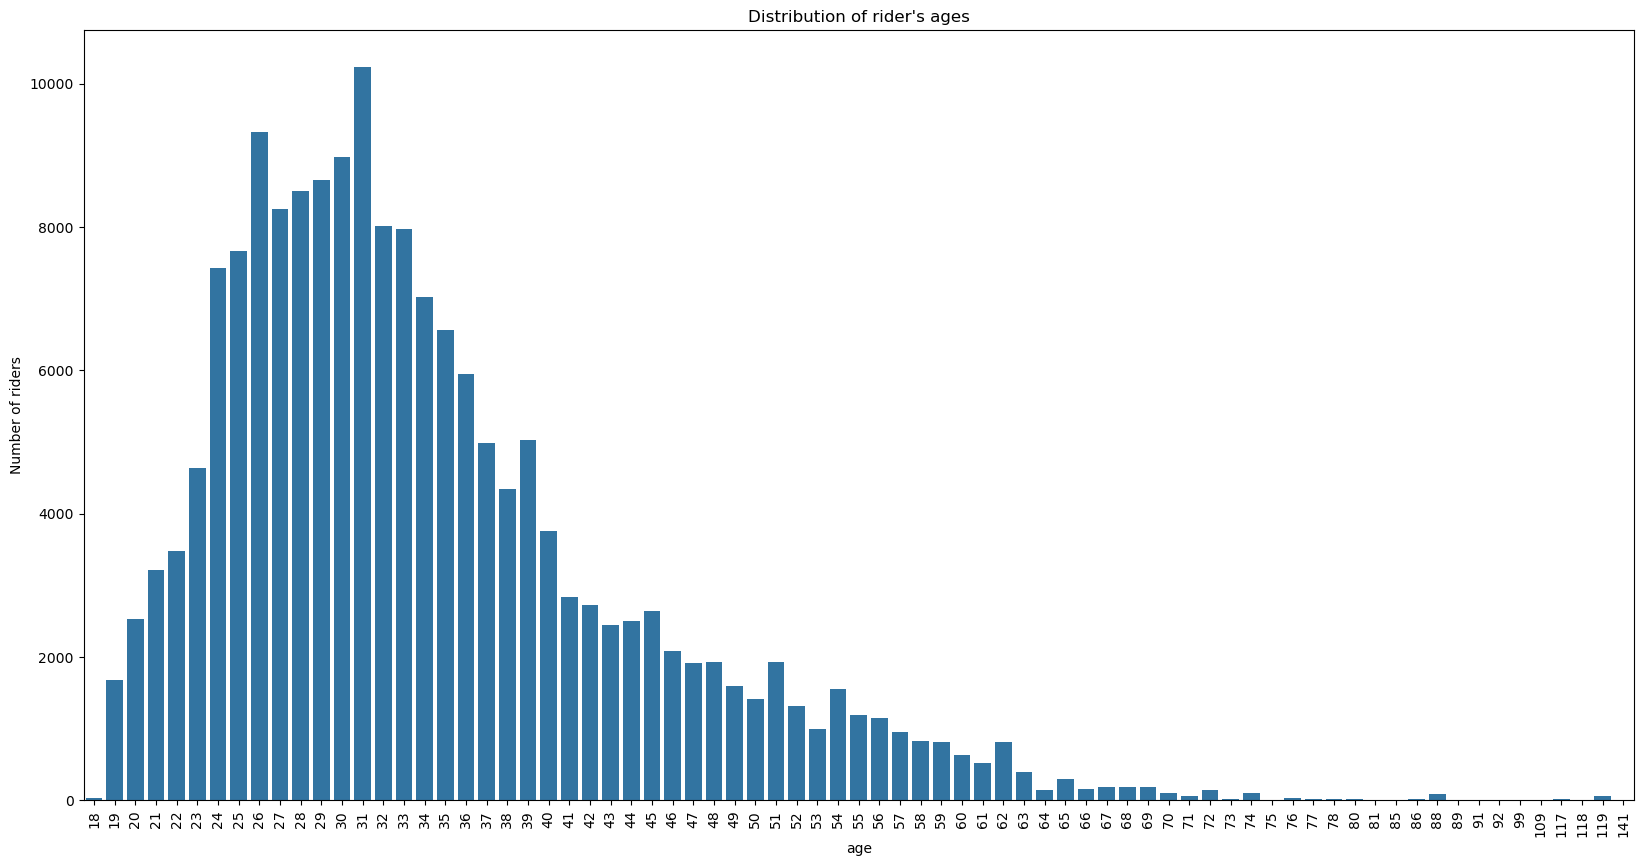

In [4]:
plt.figure(figsize=(20 , 10))
sb.countplot(x='age',data=age_subset,color=color)
plt.ylabel('Number of riders')
plt.title("Distribution of rider's ages")
plt.xticks(rotation=90);

Even though majority of the riders are aged between their mid to late 20s to early 30s we see riders older than 60 years old to even 119 years old! 

You can still get on a bike no matter the age and still be young at heart!

### Age, Gender and whether if you are customer or a subscriber is a key factor on ride duration. 

#### Age

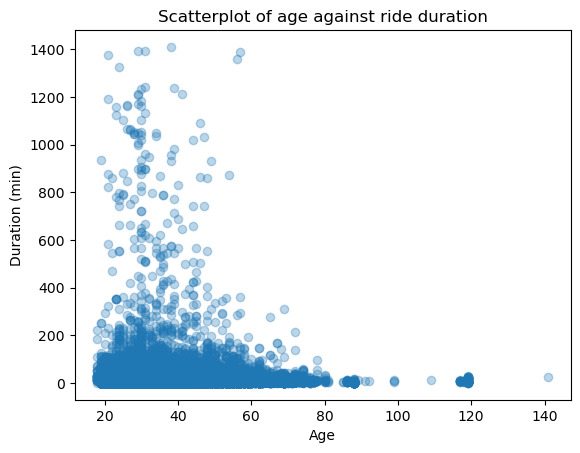

In [5]:
sb.regplot(data=age_subset, x='age',y='duration_min', y_jitter=0.08, fit_reg=False, scatter_kws= {'alpha' : 0.3})
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.title('Scatterplot of age against ride duration');

Riders between the age range 20-60 would go for longer rides compared to riders older than 60 years old.

#### Gender

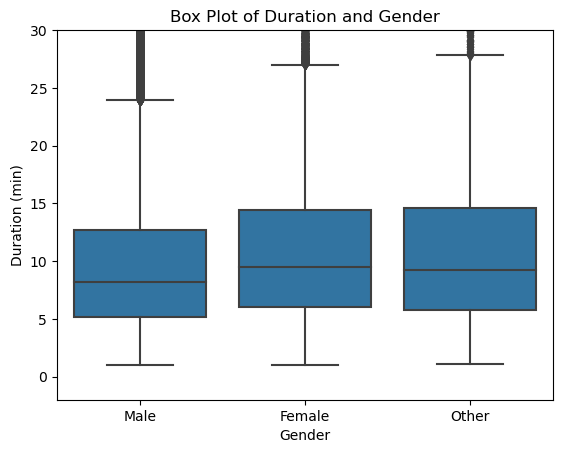

In [6]:
gender_order = df.member_gender.value_counts().index
sb.boxplot(data=df,x='member_gender',y='duration_min',color=color,order=gender_order)
plt.ylim([-2,30]) # To ignore the outliers
plt.title('Box Plot of Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (min)');

Even though male riders dominate this dataset, male riders take shorter rides (~8 minutes) compared to the other genders. 

Female and riders who identified themselves as Other take longer rides.

#### User Type

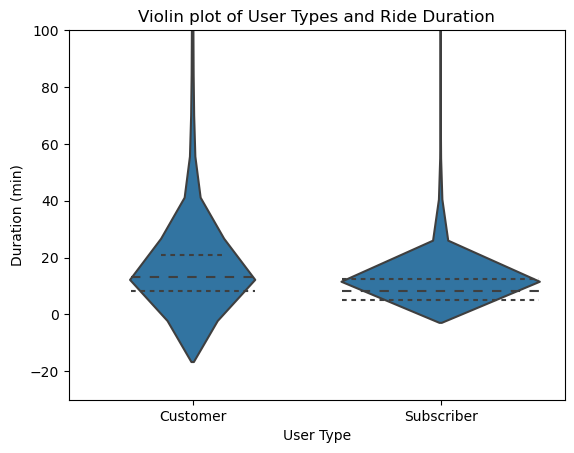

In [7]:
sb.violinplot(x=df.user_type,y=df.duration_min,color=color,inner='quartile')
plt.ylim((-30,100))
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.title("Violin plot of User Types and Ride Duration");

Customers tend to go on longer trips, the median for customers meets nicely with the subscriber's 3rd quartile.

### Are there peak hours and slow days?

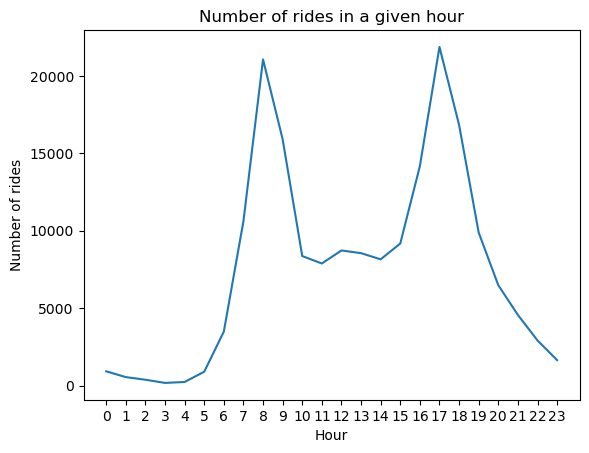

In [8]:
df['start_hour'] = df.start_time.dt.hour
hour_subset = df.groupby('start_hour').size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.title('Number of rides in a given hour');

We can see peak hours at 8am and 5pm which fits nicely during rush hours when people are heading to work and leaving work. There is also a slight spike at around noon.

#### Are there Slow days?

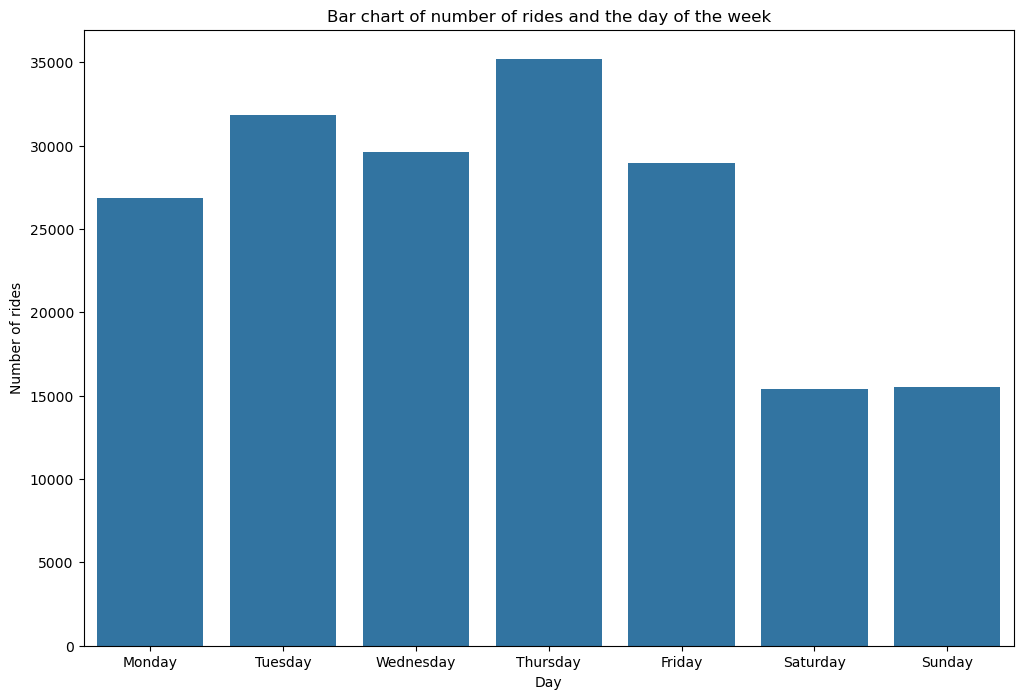

In [9]:
df['day_name'] = df.start_time.dt.day_name()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(12,8))
sb.countplot(data=df,x='day_name',color=color,order=day_order)
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title("Bar chart of number of rides and the day of the week");

Thursday had the most number of rides with the weekend having the least number of rides.

In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 852312 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
Opening in existing browser session.
^C

Interrupted
